In [50]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
%load_ext watermark
%watermark -a "author: eljirg" -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
author: eljirg 
last updated: Fri Feb 15 2019 17:13:54 Tokyo Standard Time


# Time Series - Sklearn

A note regarding `time series` implementation using sklearn 

## Imports

In [51]:
%matplotlib inline

import os, sys, time, tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [56]:
df = pd.read_csv('./dataset/zuerich_monthly_sunspot_numbers.csv')
df = df.iloc[:-1,:]

df['Date'] =  pd.to_datetime(df['Month'])
df = df.drop('Month',axis=1)

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df = df.set_index('Date')

df.head(3)

,Zuerich monthly sunspot numbers 1749-1983,Year,Month
Date,,,
1749-01-01,58.0,1749,1
1749-02-01,62.6,1749,2
1749-03-01,70.0,1749,3


In [57]:
df.describe()

,Zuerich monthly sunspot numbers 1749-1983,Year,Month
count,2820.000000,2820.000000,2820.000000
mean,51.265957,1866.000000,6.500000
std,43.448971,67.850074,3.452665
min,0.000000,1749.000000,1.000000
25%,15.700000,1807.000000,3.750000
50%,42.000000,1866.000000,6.500000
75%,74.925000,1925.000000,9.250000
max,253.800000,1983.000000,12.000000


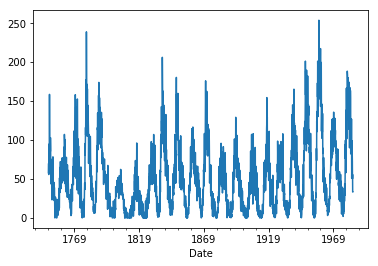

In [60]:
df.loc[:,'Zuerich monthly sunspot numbers 1749-1983'].plot()

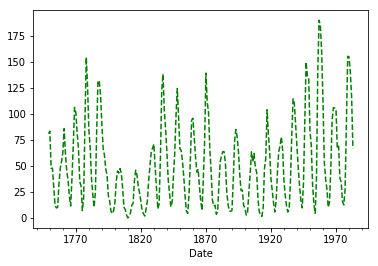

In [68]:
df_mm = df.loc[:,'Zuerich monthly sunspot numbers 1749-1983'].resample('A').mean() # resample annually 
df_mm.plot(style='g--')

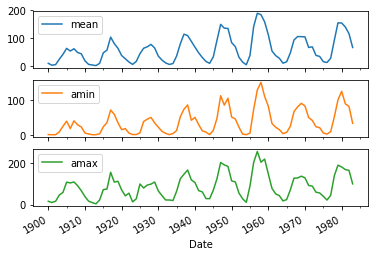

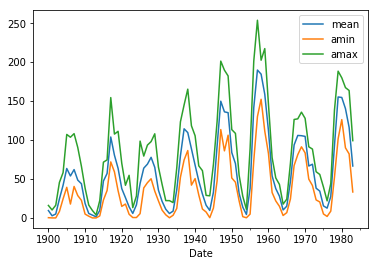

In [69]:
df_mm = df.loc[:,'Zuerich monthly sunspot numbers 1749-1983'].resample("A").apply(['mean', np.min, np.max])
df_mm['1900':'2020'].plot(subplots=True)
df_mm['1900':'2020'].plot()

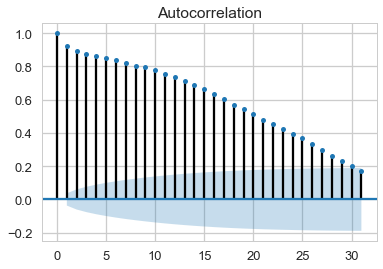

In [78]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.dates as mdates

import statsmodels.api as sm

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')


plot_acf(df.loc[:,'Zuerich monthly sunspot numbers 1749-1983'], lags=31)
plt.show()

### Time Series Decomposition

This is not fully functional at this time, see this SO question

The frequency of decomposition must be an interval, which 'may' repeat. So we have data with 15min frequency and we are looking for a weekly repetition of behavior.

$decompfreq = \cfrac{24h \cdot 60min}{15min} \cdot 7days$

In [98]:
type(df.loc[0,'Zuerich monthly sunspot numbers 1749-1983'])

numpy.float64

In [104]:
type(decompfreq)

numpy.float64

In [107]:
type(df.loc[:,'Zuerich monthly sunspot numbers 1749-1983'])

pandas.core.series.Series

In [103]:
decompfreq = np.float64(24*60/15*7)

In [109]:
res = sm.tsa.seasonal_decompose(df.loc[:,'Zuerich monthly sunspot numbers 1749-1983'].interpolate(),
                                freq=int(decompfreq),
                                model='additive')

In [119]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(30,10))
    resplot = res.plot()
    resplot.savefig('Seasonal_Decompose.png', dpi=150)

NameError: name 'mpl' is not defined

In [118]:
?res.plot

Signature: res.plot()
Docstring: <no docstring>
File:      c:\users\eljir\anaconda3\envs\pytorch\lib\site-packages\statsmodels\tsa\seasonal.py
Type:      method
